<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS0 - Erick Watt-Udogu

For this problem set, I am starting to manipulate academic rather than professional datasets. In this case, the data uploaded is preliminary survey data that was collected for a project managed by the Center for Urban Research and Education (CURE). The project team is working with Camden activists to conduct what is planned to be a mixed-methods study of guaranteed or universal basic income. In the fall, Camden residents surveyed a random sample of Camden residents in neighborhoods like Parkside on a number of items about the community, in addition to questions specifically about guaranteed income.

Over the course of the semester, I want to find ways to manage what I see as currently an unwieldy set of data to make sense of it in advance of the next round of data collection - scheduled for the spring.

# Import: Code

This section includes import code.

In [3]:
!pip install geopandas==1.0.1
import pandas as pd
import urllib.request
import numpy as np

# Data Upload



In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/datamanagement/refs/heads/main/Camden_UBI%20Survey_Results_Fall2024.csv", "UBI_Survey.csv")

('UBI_Survey.csv', <http.client.HTTPMessage at 0x7e38d02ac310>)

In [5]:
Survey = pd.read_csv('UBI_Survey.csv')

In this section, I am just getting acquainted with the data. I ran some descriptive statistics and histograms of the fields with numerical values. In the future, I want to manipulate this so it is easier to manage. In particular, I need the names of the questions to have more meaning. I want to find a replicable and sensible way of changing the question names to titles that are usable. Also, I need to cull some of the fields where the numbers are miscoded and are really text fields.

I tried to run some scatter plots, but none of the variable combinations produced anything interesting. I also want to find a way to visualize crosstabs.

I will also have to do a lot of work with this data because some of the numbers in the questions are meaningless, making descriptive statistics also meaningless. For example:

Q25
About how much total income did all members of your household earn in 2023? It’s OK if you don’t know for sure. Just tell me your best estimate.

	1. Under $15,000
	2. Between $15,000 and $29,999
	3. Between $30,000 and $49,999
	4. Between $50,000 and $74,999
	5. Between $75,000 and $99,999
	6. Between $100,000 and $150,000
	7. Over $150,000
	9. Don’t know
	0. Refused

I am looking forward to the class to help me manage these challenges.

In [6]:
Survey.head(2)

,Filenum,Location,RespID,Collector,Start_Date,End_Date,IP_Address,SCR1,SCR2,Q1,...,Q22,Q23,Q24,Q25,Q26a,Q26b,Q26c,Q26d,Q27,Q28
0,1,Parkside,1.147005e+11,432987571.0,1:09:13 PM,2:10:26 PM,172.56.29.42,1.0,1.0,7.0,...,2.0,1.0,1.0,5.0,1.0,1.0,1.0,NaN,1.0,4.0
1,1,Parkside,1.147005e+11,432987571.0,1:09:19 PM,3:12:57 PM,172.56.216.71,1.0,1.0,5.0,...,3.0,1.0,2.0,9.0,4.0,NaN,NaN,NaN,2.0,4.0


In [7]:
Survey.dtypes

,0
Filenum,int64
Location,object
RespID,float64
Collector,float64
Start_Date,object
...,...
Q26b,float64
Q26c,float64
Q26d,float64
Q27,float64


In [8]:
Survey.select_dtypes(include='float')

,RespID,Collector,SCR1,SCR2,Q1,Q2,Q3,Q4_1,Q4_2,Q4_3,...,Q22,Q23,Q24,Q25,Q26a,Q26b,Q26c,Q26d,Q27,Q28
0,1.147005e+11,432987571.0,1.0,1.0,7.0,1.0,3.0,2.0,2.0,1.0,...,2.0,1.0,1.0,5.0,1.0,1.0,1.0,NaN,1.0,4.0
1,1.147005e+11,432987571.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,...,3.0,1.0,2.0,9.0,4.0,NaN,NaN,NaN,2.0,4.0
2,1.147005e+11,432987571.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,2.0,...,2.0,1.0,3.0,4.0,2.0,2.0,2.0,NaN,2.0,3.0
3,1.147005e+11,432987571.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,4.0,1.0,1.0,2.0,NaN,1.0,3.0
4,1.147005e+11,432987571.0,1.0,1.0,6.0,1.0,3.0,2.0,2.0,2.0,...,1.0,1.0,3.0,1.0,5.0,NaN,NaN,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.187322e+11,458466528.0,1.0,1.0,7.0,1.0,3.0,2.0,2.0,2.0,...,2.0,3.0,3.0,3.0,1.0,1.0,1.0,NaN,2.0,4.0
305,1.187322e+11,458466528.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,...,3.0,3.0,5.0,4.0,1.0,1.0,1.0,NaN,2.0,3.0
306,1.187322e+11,458466528.0,1.0,1.0,8.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,2.0,2.0,4.0,NaN,NaN,NaN,2.0,4.0
307,1.187322e+11,458466528.0,1.0,1.0,8.0,1.0,4.0,4.0,2.0,2.0,...,3.0,5.0,3.0,2.0,2.0,1.0,1.0,NaN,1.0,3.0


array([[<Axes: title={'center': 'Filenum'}>,
        <Axes: title={'center': 'RespID'}>,
        <Axes: title={'center': 'Collector'}>,
        <Axes: title={'center': 'SCR1'}>,
        <Axes: title={'center': 'SCR2'}>, <Axes: title={'center': 'Q1'}>,
        <Axes: title={'center': 'Q2'}>, <Axes: title={'center': 'Q3'}>],
       [<Axes: title={'center': 'Q4_1'}>,
        <Axes: title={'center': 'Q4_2'}>,
        <Axes: title={'center': 'Q4_3'}>,
        <Axes: title={'center': 'Q4_4'}>,
        <Axes: title={'center': 'Q4_5'}>,
        <Axes: title={'center': 'Q4_6'}>,
        <Axes: title={'center': 'Q4_7'}>,
        <Axes: title={'center': 'Q4_8'}>],
       [<Axes: title={'center': 'Q5_1'}>,
        <Axes: title={'center': 'Q5_2'}>,
        <Axes: title={'center': 'Q5_3'}>,
        <Axes: title={'center': 'Q5_4'}>,
        <Axes: title={'center': 'Q5_5'}>,
        <Axes: title={'center': 'Q6_1'}>,
        <Axes: title={'center': 'Q6_2'}>,
        <Axes: title={'center': 'Q6_3'}>],
 

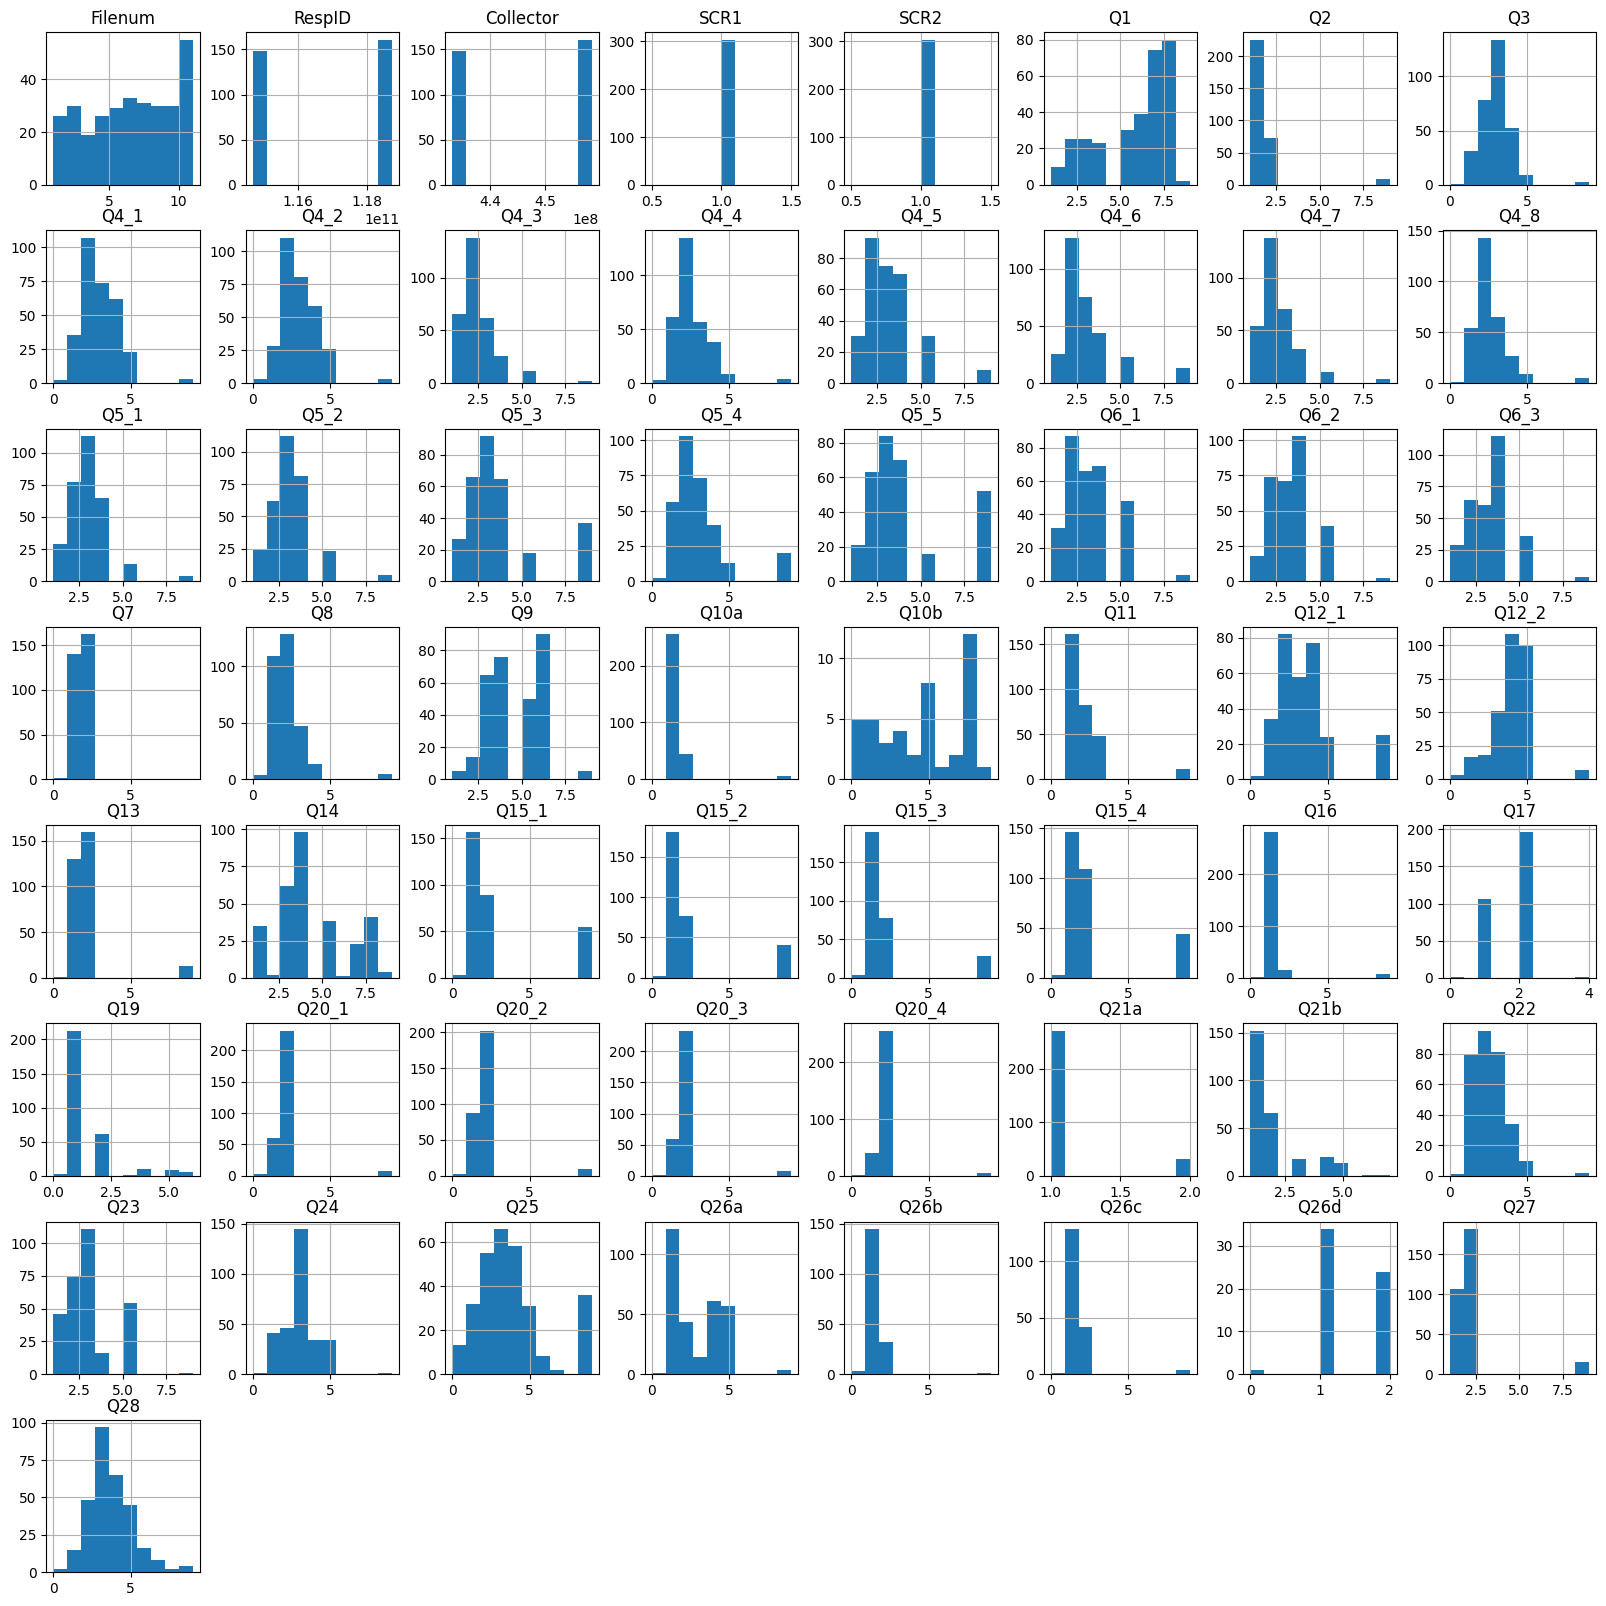

In [ ]:
Survey.hist(figsize=(20,20))

In [12]:
Survey.describe().T.round(3)
#this is only readable when I look at it in an interactive table. I tried to change the round variable to no avail.

,count,mean,std,min,25%,50%,75%,max
Filenum,309.0,6.146000e+00,3.129000e+00,1.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.100000e+01
RespID,309.0,1.168019e+11,2.007459e+09,1.147005e+11,1.147113e+11,1.187098e+11,1.187263e+11,1.187322e+11
Collector,309.0,4.462770e+08,1.258111e+07,4.329876e+08,4.331684e+08,4.580927e+08,4.583677e+08,4.584665e+08
SCR1,304.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
SCR2,304.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Q1,308.0,5.802000e+00,2.133000e+00,1.000000e+00,4.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00
Q2,307.0,1.469000e+00,1.377000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
Q3,308.0,2.821000e+00,1.137000e+00,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,9.000000e+00
Q4_1,306.0,2.814000e+00,1.301000e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
Q4_2,308.0,2.847000e+00,1.291000e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
